##  IMporting Libraries and Dataframe

In [1]:
import numpy as np
import pandas as pd


In [2]:
df=pd.read_csv('spam.csv',encoding='latin1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
275,ham,Thanx...,NaN,NaN,NaN
3371,ham,And now electricity just went out fml.,NaN,NaN,NaN
3707,spam,Free Top ringtone -sub to weekly ringtone-get ...,NaN,NaN,NaN
1155,ham,"Sorry man, accidentally left my phone on silen...",NaN,NaN,NaN
1842,ham,"\Are you comingdown later?\""""",NaN,NaN,NaN


In [4]:
df.info()  #dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.shape  #shape of data

(5572, 2)

## Data preprocessing

In [8]:
df.rename(columns={'v1':'output','v2':'text'},inplace=True)
df.head()

,output,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


### data encoding

In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
df['output']=encoder.fit_transform(df['output'])   #making label encoders of output
df.head(3)

,output,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [11]:
df.isna().sum()

output    0
text      0
dtype: int64

In [12]:
df.duplicated().sum()  #checking for duplicates

np.int64(403)

In [13]:
#removing duplicates
df=df.drop_duplicates(keep='first')

In [14]:
df.head(3)  
#database after removing duplicates messages

,output,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...


In [15]:
# checking no of hams and spams msgs
df['output'].value_counts()
# 0: hams
#1: spams


output
0    4516
1     653
Name: count, dtype: int64

### Data visualization

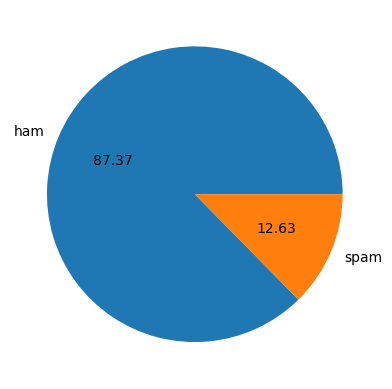

In [16]:
import matplotlib.pyplot as plt
plt.pie(df['output'].value_counts(),labels=['ham','spam'],autopct="%0.2f")  #percentage of ham and spam msgs
plt.show()

In [17]:
# Data is imbalance


In [18]:
!pip install nltk

In [19]:
import nltk
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\premier\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

### Counting no of words and characters into sentences

In [20]:
df['num_characters']=df['text'].apply(len)   #defines no of characters into msg
df.head()

,output,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
#num of words into sentence
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))  #counting words into a sentence
  

In [22]:
df.head()

,output,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
#it breaks sentence into parts on the basis of sentences
df['num_sent']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))  #counting words into a sentence


In [24]:
df.head()

,output,text,num_characters,num_words,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
df[['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
df[['num_characters','num_words','num_sent']].info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   num_characters  5169 non-null   int64
 1   num_words       5169 non-null   int64
 2   num_sent        5169 non-null   int64
dtypes: int64(3)
memory usage: 161.5 KB


In [27]:
df[df['output'] == 0][['num_characters','num_words','num_sent']].describe()  # to check characteristics of ham msgs

,num_characters,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [28]:
df[df['output'] == 1][['num_characters','num_words','num_sent']].describe()  # to check characteristics of spam msgs

,num_characters,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


### Data Visualization using histogram using his, paiplot and pandas

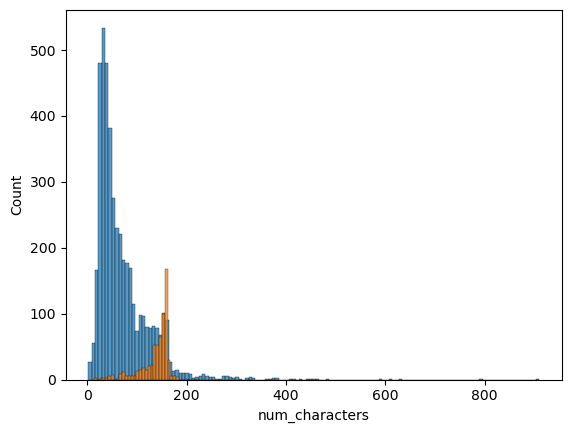

In [29]:
# histogram
import seaborn as sns
sns.histplot(df[df['output']== 0]['num_characters'])
sns.histplot(df[df['output']== 1]['num_characters'])
plt.show()

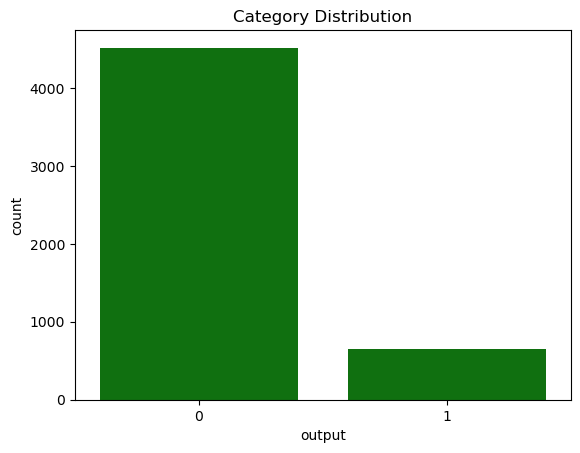

In [30]:


sns.countplot(x='output', data=df, color='green')
plt.title('Category Distribution')
plt.show()


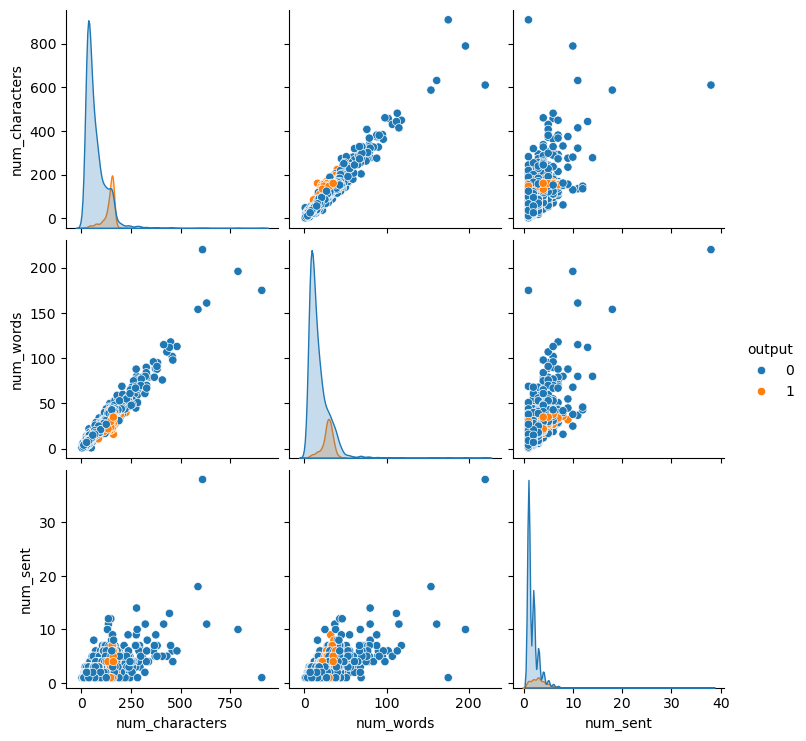

In [31]:
sns.pairplot(df,hue='output')
plt.show()

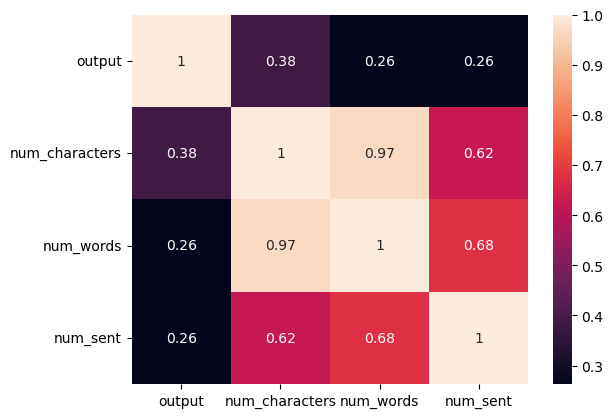

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

#heat map of numerical data values
numeric_df = df.select_dtypes(include=['int64', 'float64'])
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()


### Data preprocessing 

In [33]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\premier\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [34]:

from nltk.corpus import stopwords
stopwords.words('english')   #stopwords
import string


In [35]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [36]:
def transform_text(text):
    text=text.lower()   #converts text into lower case
    text=nltk.word_tokenize(text)   #splits text into words

    y=[]
    for i in text:
        if i.isalnum ():   #removing special characters
         y.append(i)

    text=y[:]  #copying list here 
    y.clear()

    for i in text:
        if i not in stopwords.words('english')and i not in string.punctuation:
         y.append(i)

    text=y[:]
    y.clear()
    
    for i in text:
      y.append(ps.stem(i))   #word stemming
    
    return  " ".join(y) 
   

In [37]:
transform_text('hi its me alarming point here?')

'hi alarm point'

In [38]:
df['transformed text']=df['text'].apply(transform_text)

In [39]:
df.head(3)

,output,text,num_characters,num_words,num_sent,transformed text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...


In [40]:
!pip install wordcloud

### Word cloud of spam and ham  msgs
## Ham word cloud

In [41]:
from wordcloud import WordCloud

wc = WordCloud(
    width=500,
    height=500,
    min_font_size=10,
    background_color='white'   #spam messages wordcloud
)


In [42]:
spam_wc=wc.generate(df[df['output']==1]['transformed text'].str.cat(sep=" "))

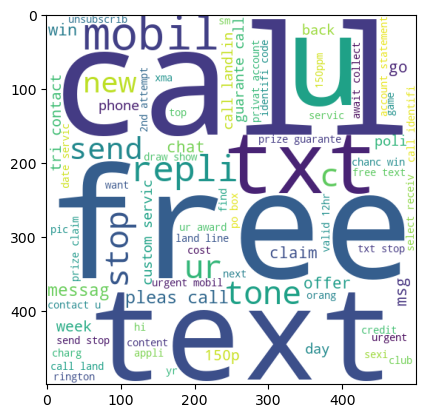

In [43]:
plt.imshow(spam_wc)

## Ham word cloud

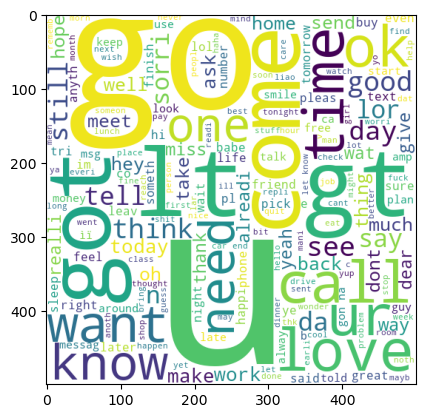

In [44]:
Ham_wc=wc.generate(df[df['output']==0]['transformed text'].str.cat(sep=" "))
plt.imshow(Ham_wc)

## Finding mostly used  keywords in spam messages

In [45]:
spam_corpus=[]
for msg in df[df['output']==1]['transformed text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [46]:
len(spam_corpus)

9939

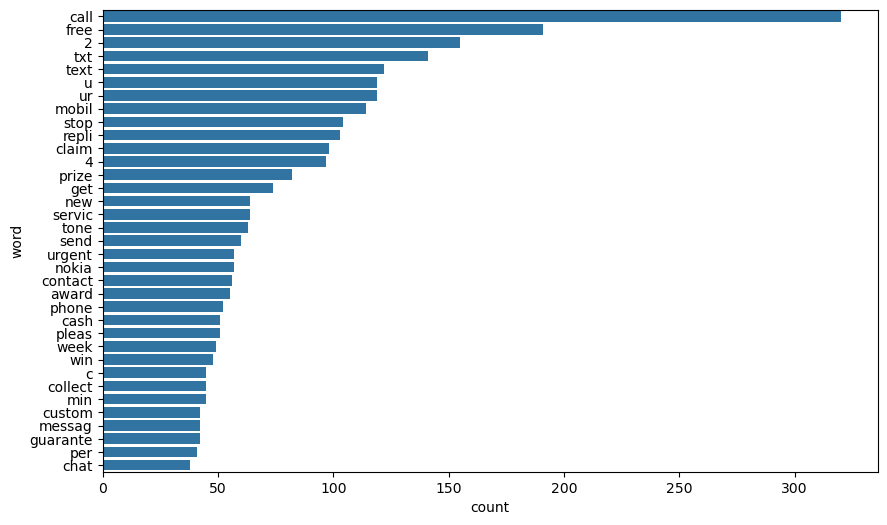

In [47]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count top 35 words in spam corpus
word_count = pd.DataFrame(Counter(spam_corpus).most_common(35))  #count occuring of spam msgs and then convert it into dataframe
word_count.columns = ['word', 'count']  

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='word', data=word_count)
plt.xticks(rotation='horizontal')
plt.show()


### Mostly ised keywords in Ham messages

In [48]:
Ham_corpus=[]
for msg in df[df['output']==0]['transformed text'].tolist():
    for word in msg.split():
        Ham_corpus.append(word)

In [49]:
len(Ham_corpus)

35404

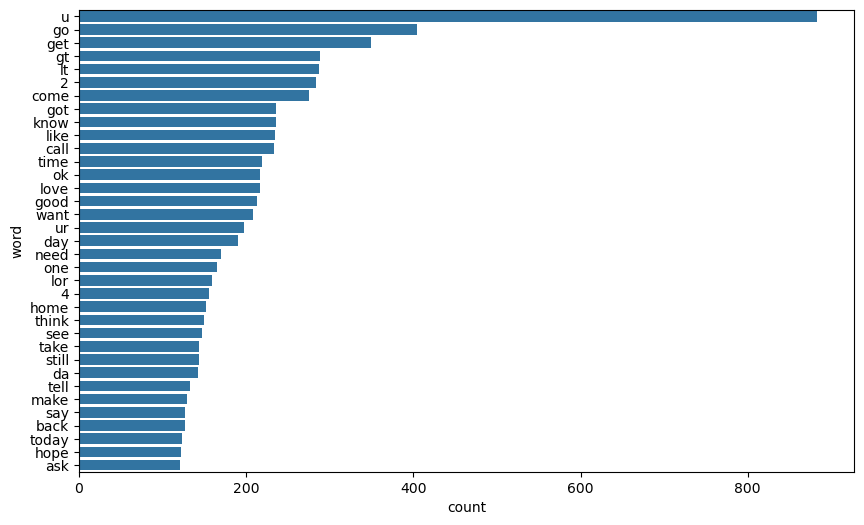

In [50]:

# Count top 35 words in spam corpus
word_count = pd.DataFrame(Counter(Ham_corpus).most_common(35))  #count occuring of spam msgs and then convert it into dataframe
word_count.columns = ['word', 'count']  

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='count', y='word', data=word_count)
plt.xticks(rotation='horizontal')
plt.show()

## Model Building and training Using Naive Bayes

In [51]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [52]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [53]:
gnb=GaussianNB()
Mnb=MultinomialNB()
Bnb=BernoulliNB()

## Model training using tfidf vectorizer with multi Naive bayes models

## 1. Guassian naive bayes model 

In [54]:
X_2 = tfidf.fit_transform(df['transformed text']).toarray()
y_2=df['output'].values

In [55]:
X_2.shape

(5169, 3000)

In [56]:
y_2.shape

(5169,)

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X_2, y_2,test_size=0.2, random_state=42)

In [59]:
gnb.fit(X_train, y_train)
y2_pred1=gnb.predict(X_test)
print(f"Accuracy : {accuracy_score(y_test,y2_pred1)}")
print(f"Conusion matrix:\n {confusion_matrix(y_test,y2_pred1)}")
print(f"precision score:{precision_score(y_test,y2_pred1)}")

Accuracy : 0.8626692456479691
Conusion matrix:
 [[771 118]
 [ 24 121]]
precision score:0.5062761506276151


## 2. Multinomial Naive bayes model by tfidf

In [60]:
Mnb.fit(X_train, y_train)
y2_pred2=Mnb.predict(X_test)
print(f"Accuracy : {accuracy_score(y_test,y2_pred2)}")
print(f"Conusion matrix:\n {confusion_matrix(y_test,y2_pred2)}")
print(f"precision score:{precision_score(y_test,y2_pred2)}")

Accuracy : 0.9729206963249516
Conusion matrix:
 [[888   1]
 [ 27 118]]
precision score:0.9915966386554622


## 3. Bernoulli Naive Bayes model by tfidf

In [61]:
Bnb.fit(X_train, y_train)
y2_pred3=Bnb.predict(X_test)
print(f"Accuracy : {accuracy_score(y_test,y2_pred3)}")
print(f"Conusion matrix:\n {confusion_matrix(y_test,y2_pred3)}")
print(f"precision score:{precision_score(y_test,y2_pred3)}")

Accuracy : 0.9729206963249516
Conusion matrix:
 [[884   5]
 [ 23 122]]
precision score:0.9606299212598425


In [62]:
pip install xgboost


Note: you may need to restart the kernel to use updated packages.


## Multimodels using here

Logistic Regression

SVc

Random Forest

Decision Tree

XGBoost 

KNN Classifier

GradientBooster

Multinomial Naive Bayes

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [64]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [65]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    #'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [66]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [67]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9477611940298507


C:\Users\premier\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\premier\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\premier\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\premier\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^

For  KN
Accuracy -  0.9042553191489362
Precision -  1.0
For  NB
Accuracy -  0.9729206963249516
Precision -  0.9915966386554622
For  DT
Accuracy -  0.9323017408123792
Precision -  0.8205128205128205
For  LR
Accuracy -  0.9468085106382979
Precision -  0.8629032258064516
For  RF
Accuracy -  0.971953578336557
Precision -  0.9915254237288136
For  ETC
Accuracy -  0.9796905222437138
Precision -  1.0
For  GBDT
Accuracy -  0.9497098646034816
Precision -  0.9514563106796117
For  xgb
Accuracy -  0.9680851063829787
Precision -  0.9375


In [68]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [69]:
performance_df 

,Algorithm,Accuracy,Precision
1,KN,0.904255,1.000000
6,ETC,0.979691,1.000000
2,NB,0.972921,0.991597
5,RF,0.971954,0.991525
7,GBDT,0.949710,0.951456
0,SVC,0.975822,0.947761
8,xgb,0.968085,0.937500
4,LR,0.946809,0.862903
3,DT,0.932302,0.820513


In [70]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [71]:
from sklearn.ensemble import StackingClassifier

In [72]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [73]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


Accuracy 0.9816247582205029
Precision 0.95


In [74]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(Mnb,open('model.pkl','wb'))